<a href="https://colab.research.google.com/github/Ebasurtos/Machine-Learning/blob/main/Proyecto_2_3_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto 2**

**Participantes:**

1.   Jorge Palacios
2.   Eder Basurto
3.   Rodolfo Morocho

**Carga de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Ciclo III/Machine Learning/Proyecto 2 Clustering/Online Retail.xlsx'
df = pd.read_excel(path, engine='openpyxl')

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


**Paso 1: Preprocesamiento y Construcción de Tabla Agregada**

**a. Eliminación de Nulos**

In [ ]:
df_sin_nulos = df.dropna()

In [ ]:
df_sin_nulos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**b. Corrección de devoluciones**

Eliminamos datos de descuentos (D) y registros manuales (M) ya que no se puede identificar a que venta o producto corresponde. Asimismo se identificó que la columna Stock Code cuenta con otros valores no vinculados a códigos de productos o ventas tales como BANK CHARGES, POST, C2, CRUK, PADS y DOT

In [ ]:
df_sin_desc_man = df_sin_nulos.drop(df_sin_nulos[(df_sin_nulos['StockCode'] == 'D') | (df_sin_nulos['StockCode'] == 'M') | (df_sin_nulos['StockCode'] == 'BANK CHARGES') | (df_sin_nulos['StockCode'] == 'POST') | (df_sin_nulos['StockCode'] == 'C2') | (df_sin_nulos['StockCode'] == 'CRUK') | (df_sin_nulos['StockCode'] == 'PADS') | (df_sin_nulos['StockCode'] == 'DOT')].index)

In [ ]:
df_sin_desc_man

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


De la inspección de los datos se identificó que las devoluciones no pueden aplicarse sobre alguna venta debido a que: i) No se cuenta con una campo que vincule la devolución con la venta original; ii) No se puede aplicar la devolución a la venta previa puesto que existen devoluciones antes que registros de ventas. En base a lo señalado no se consideraran las devoluciones.

In [ ]:
columnas = ['Quantity']
df_sin_negs = df_sin_desc_man[df_sin_desc_man[columnas].ge(0).all(axis=1)]

In [ ]:
df_sin_negs

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df_prep = df_sin_negs.copy()

**c. Construcción de Tabla agregada**

In [ ]:
# Hallamos el valor de la compra por cada fila.
df_prep['TotalSpent'] = df_prep['Quantity'] * df_prep['UnitPrice']

In [ ]:
df_prep

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
# Fecha mas reciente del Dataset
max_date = df_prep['InvoiceDate'].max()

# Fecha más reciente de compra
last_purchase_per_customer = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase_per_customer.rename(columns={'InvoiceDate': 'LastPurchaseDate'}, inplace=True)

# Agregación
customer_data = df_prep.groupby('CustomerID').agg(
    frequency=('InvoiceNo', 'nunique'),  # Número de facturas únicas
    monetary_value=('TotalSpent', 'sum'),  # Suma total gastada
    avg_ticket=('TotalSpent', 'mean'),  # Gasto promedio por factura
    num_unique_products=('StockCode', 'nunique'),  # Productos únicos comprados
    country=('Country', 'first')  # País del cliente (asumiendo que es el mismo para todas sus compras)
).reset_index()

#Calcular Recency
customer_data = customer_data.merge(last_purchase_per_customer, on='CustomerID')
customer_data['recency'] = (max_date - customer_data['LastPurchaseDate']).dt.days

In [ ]:
customer_data

,CustomerID,frequency,monetary_value,avg_ticket,num_unique_products,country,LastPurchaseDate,recency
0,12346.0,1,77183.60,77183.600000,1,United Kingdom,2011-01-18 10:17:00,325
1,12347.0,7,4310.00,23.681319,103,Iceland,2011-12-07 15:52:00,1
2,12348.0,4,1437.24,53.231111,21,Finland,2011-09-25 13:13:00,74
3,12349.0,1,1457.55,20.243750,72,Italy,2011-11-21 09:51:00,18
4,12350.0,1,294.40,18.400000,16,Norway,2011-02-02 16:01:00,309
...,...,...,...,...,...,...,...,...
4330,18280.0,1,180.60,18.060000,10,United Kingdom,2011-03-07 09:52:00,277
4331,18281.0,1,80.82,11.545714,7,United Kingdom,2011-06-12 10:53:00,180
4332,18282.0,2,178.05,14.837500,12,United Kingdom,2011-12-02 11:43:00,7
4333,18283.0,16,2088.93,2.770464,262,United Kingdom,2011-12-06 12:02:00,3


In [ ]:
customer_data_final = customer_data.drop('LastPurchaseDate', axis=1)
column_order = ['CustomerID', 'frequency', 'recency', 'monetary_value', 'avg_ticket', 'num_unique_products', 'country']
customer_data_final['CustomerID'] = customer_data_final['CustomerID'].astype(int)
customer_data_final = customer_data_final[column_order]

In [ ]:
customer_data_final

,CustomerID,frequency,recency,monetary_value,avg_ticket,num_unique_products,country
0,12346,1,325,77183.60,77183.600000,1,United Kingdom
1,12347,7,1,4310.00,23.681319,103,Iceland
2,12348,4,74,1437.24,53.231111,21,Finland
3,12349,1,18,1457.55,20.243750,72,Italy
4,12350,1,309,294.40,18.400000,16,Norway
...,...,...,...,...,...,...,...
4330,18280,1,277,180.60,18.060000,10,United Kingdom
4331,18281,1,180,80.82,11.545714,7,United Kingdom
4332,18282,2,7,178.05,14.837500,12,United Kingdom
4333,18283,16,3,2088.93,2.770464,262,United Kingdom


**Paso 2: Reducción de Dimensionalidad**

**Escalado de datos**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['frequency', 'recency', 'monetary_value', 'avg_ticket', 'num_unique_products']
X = customer_data_final[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**a. PCA**

In [ ]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.44637288 0.2323492  0.16863699 0.09949487 0.05314606]


Como podemos observar 4 variables capturan el 94,6% de la varianza

In [ ]:
pca = PCA(n_components=0.84)
pca.fit(X_scaled)
print("Número de componentes seleccionados:", pca.n_components_)

Número de componentes seleccionados: 3


In [ ]:
import plotly.express as px

pca_df_graph = pca_df.copy()
pca_df_graph['CustomerID'] = customer_data_final['CustomerID']
pca_df_graph['country'] = customer_data_final['country']

fig = px.scatter_3d(
    pca_df_graph,
    x='PC1',
    y='PC2',
    z='PC3',
    color='country',  # Colorear por país
    hover_data='CustomerID',  # Mostrar ID al pasar el mouse
    opacity=0.7,
    title='PCA en 3D: Comportamiento de Clientes'
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

fig.write_html("pca_3d.html")

**b. t-SNE**

In [ ]:
from sklearn.manifold import TSNE

# Inicializar t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X_scaled)

# Crear DataFrame con los resultados
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2', 'TSNE3'])

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [ ]:
import plotly.express as px

tsne_df_graph = tsne_df.copy()
tsne_df_graph['CustomerID'] = customer_data_final['CustomerID']
tsne_df_graph['country'] = customer_data_final['country']

fig = px.scatter_3d(
    tsne_df_graph,
    x='TSNE1',
    y='TSNE2',
    z='TSNE3',
    color='country',  # Colorear por país
    hover_data='CustomerID',  # Mostrar ID al pasar el mouse
    opacity=0.7,
    title='t-SNE en 3D: Comportamiento de Clientes'
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()
fig.write_html("tsne_3d.html")

**c. UMAP**

In [ ]:
import umap

reducer = umap.UMAP(
    n_components=3,          # Reducir a 2D (cambia a 3 para 3D)
    n_neighbors=15,          # Número de vecinos (ajusta según tu dataset)
    min_dist=0.1,            # Distancia mínima entre puntos (controla agrupamiento)
    metric='euclidean',      # Métrica de distancia (opciones: 'cosine', 'manhattan')
    random_state=42          # Para reproducibilidad
)

# Ajustar y transformar los datos
embedding = reducer.fit_transform(X_scaled)

# Crear DataFrame con los resultados
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2', 'UMAP3'])


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
import plotly.express as px

umap_df_graph = umap_df.copy()
umap_df_graph['CustomerID'] = customer_data_final['CustomerID']
umap_df_graph['country'] = customer_data_final['country']

fig = px.scatter_3d(
    umap_df_graph,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='country',  # Colorear por país
    hover_data='CustomerID',  # Mostrar ID al pasar el mouse
    opacity=0.7,
    title='UMAP en 3D: Comportamiento de Clientes'
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()
fig.write_html("umap_3d.html")

**d. Autoencoders**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Dimensión de entrada (número de características después del preprocesamiento)
input_dim = X_scaled.shape[1]
encoding_dim = 3

# Capas
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder_output = Dense(encoding_dim, activation='linear')(encoder)  # Capa latente

decoder = Dense(64, activation='relu')(encoder_output)
decoder = Dense(128, activation='relu')(decoder)
decoder_output = Dense(input_dim, activation='linear')(decoder)  # Reconstrucción

# Modelo
autoencoder = Model(inputs=input_layer, outputs=decoder_output)
encoder_model = Model(inputs=input_layer, outputs=encoder_output)  # Solo el encoder

# Compilar
autoencoder.compile(optimizer=Adam(0.001), loss='mse')  # Pérdida: Error Cuadrático Medio

In [ ]:
history = autoencoder.fit(
    X_scaled, X_scaled,  # Autoencoders usan X como input y target
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6096 - val_loss: 0.1515
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1491 - val_loss: 0.2094
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0737 - val_loss: 0.1389
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - val_loss: 0.0959
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0446 - val_loss: 0.0817
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1816 - val_loss: 0.0119
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0337 - val_loss: 0.1759
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1851 - val_loss: 0.0376
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0634 - val_loss: 0.0321
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0306 - val_loss: 0.0216
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0170 - val_loss: 0.0173
Epoch 12/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [ ]:
encoded_features = encoder_model.predict(X_scaled)
encoded_df = pd.DataFrame(encoded_features, columns=['AE1', 'AE2', 'AE3'])

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
import plotly.express as px

encoded_df_graph = encoded_df.copy()
encoded_df_graph['CustomerID'] = customer_data_final['CustomerID']
encoded_df_graph['country'] = customer_data_final['country']


fig = px.scatter_3d(
    encoded_df_graph,
    x='AE1',
    y='AE2',
    z='AE3',
    color='country',  # Colorear por país
    hover_data='CustomerID',  # Mostrar ID al pasar el mouse
    opacity=0.7,
    title='Autoencoders en 3D: Comportamiento de Clientes'
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()
fig.write_html("ae_3d.html")

**Paso 3: Clustering, Evaluación y Visualización**

**a. KMeans**

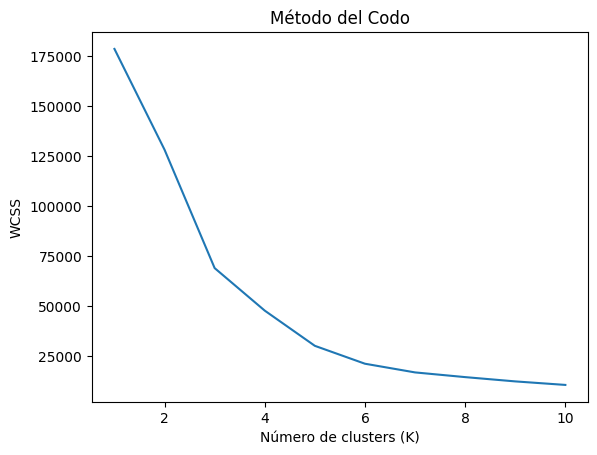

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(umap_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters (K)')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()

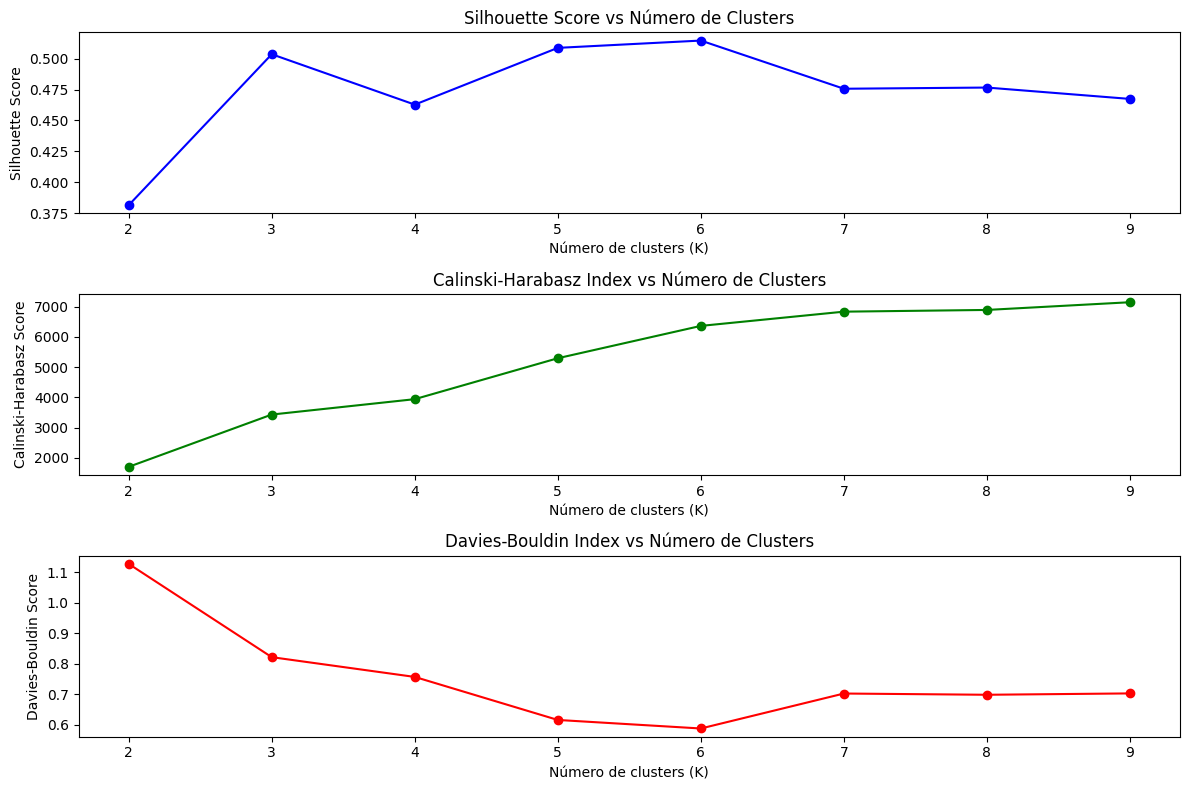

Óptimo número de clusters según Silhouette: 6
Óptimo número de clusters según Calinski-Harabasz: 9
Óptimo número de clusters según Davies-Bouldin: 6
Tiempo de ejecución: 3.528562068939209 segundos


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import time

inicio_kmeans = time.time()

# Rango de clusters a evaluar
k_range = range(2, 10)

# Almacenar métricas
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(umap_df)

    # Calcular métricas
    silhouette_scores.append(silhouette_score(umap_df, labels))
    calinski_scores.append(calinski_harabasz_score(umap_df, labels))
    davies_scores.append(davies_bouldin_score(umap_df, labels))

# Graficar todas las métricas juntas
plt.figure(figsize=(12, 8))

# Silhouette Score
plt.subplot(3, 1, 1)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Número de Clusters')

# Calinski-Harabasz Index
plt.subplot(3, 1, 2)
plt.plot(k_range, calinski_scores, 'go-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index vs Número de Clusters')

# Davies-Bouldin Index
plt.subplot(3, 1, 3)
plt.plot(k_range, davies_scores, 'ro-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index vs Número de Clusters')

plt.tight_layout()
plt.show()

# Mostrar valores óptimos (ejemplo para Silhouette)
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"Óptimo número de clusters según Silhouette: {optimal_k_silhouette}")

# Para Calinski-Harabasz (mayor es mejor)
optimal_k_calinski = k_range[np.argmax(calinski_scores)]
print(f"Óptimo número de clusters según Calinski-Harabasz: {optimal_k_calinski}")

# Para Davies-Bouldin (menor es mejor)
optimal_k_davies = k_range[np.argmin(davies_scores)]
print(f"Óptimo número de clusters según Davies-Bouldin: {optimal_k_davies}")

fin_kmeans = time.time()

tiempo_ejecucion_kmeans = fin_kmeans - inicio_kmeans
print(f"Tiempo de ejecución: {tiempo_ejecucion_kmeans} segundos")

In [ ]:
kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
clusters_mix = kmeans.fit_predict(umap_df)

In [ ]:
fig_kmeans_mix = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=clusters_mix.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con K-means (Plotly) - Aplicando mejores parametros para Silhouette - Davies Bouldin'
)

fig_kmeans_mix.show()
fig_kmeans_mix.write_html("kmeans_mix_3d.html")

In [ ]:
kmeans = KMeans(n_clusters=optimal_k_calinski, random_state=42)
clusters_cal = kmeans.fit_predict(umap_df)

In [ ]:
fig_kmeans_cal = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=clusters_cal.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con K-means (Plotly) - Aplicando mejores parametros para Calinski-Harabasz'
)

fig_kmeans_cal.show()
fig_kmeans_cal.write_html("kmeans_cal_3d.html")

**b. DBScan**

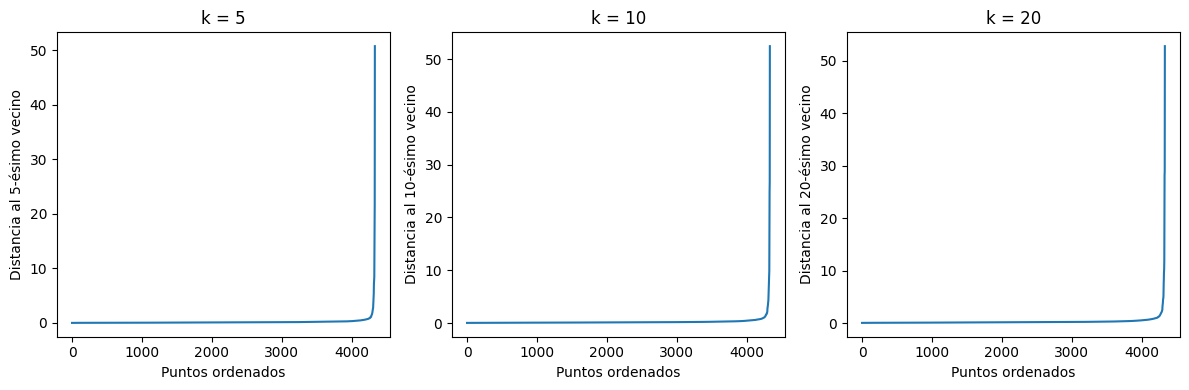

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k_values = [5, 10, 20]

plt.figure(figsize=(12, 4))

for i, k in enumerate(k_values):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X_scaled)
    distances, _ = nbrs.kneighbors(X_scaled)
    k_distances = np.sort(distances[:, -1])

    plt.subplot(1, 3, i+1)
    plt.plot(k_distances)
    plt.title(f'k = {k}')
    plt.xlabel('Puntos ordenados')
    plt.ylabel(f'Distancia al {k}-ésimo vecino')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import pandas as pd
import time

inicio_dbscan = time.time()

def find_best_dbscan_params(X, eps_range, min_samples_range):
    best_silhouette = -1
    best_calinski = -1
    best_davies = np.inf
    best_params = {'eps': None, 'min_samples': None}
    results = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Solo calcular métricas si hay más de un cluster y no demasiados
            n_clusters = len(np.unique(labels[labels != -1]))  # Ignorar ruido (-1)
            if n_clusters > 1 and n_clusters < len(X)//2:
                silhouette = silhouette_score(X, labels)
                calinski = calinski_harabasz_score(X, labels)
                davies = davies_bouldin_score(X, labels)

                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'silhouette': silhouette,
                    'calinski': calinski,
                    'davies': davies,
                    'n_clusters': n_clusters
                })

                # Actualizar mejores parámetros para cada métrica
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params_silhouette = {'eps': eps, 'min_samples': min_samples}

                if calinski > best_calinski:
                    best_calinski = calinski
                    best_params_calinski = {'eps': eps, 'min_samples': min_samples}

                if davies < best_davies:
                    best_davies = davies
                    best_params_davies = {'eps': eps, 'min_samples': min_samples}

    return {
        'best_params_silhouette': best_params_silhouette,
        'best_silhouette': best_silhouette,
        'best_params_calinski': best_params_calinski,
        'best_calinski': best_calinski,
        'best_params_davies': best_params_davies,
        'best_davies': best_davies,
        'all_results': results
    }

# Rangos de parámetros a probar
eps_range = np.arange(0.1, 3, 0.1)
min_samples_range = range(2, 20)

# Ejecutar la búsqueda
results = find_best_dbscan_params(X_scaled, eps_range, min_samples_range)

# Mostrar resultados
print(f"Mejores parámetros según Silhouette: {results['best_params_silhouette']} (Score: {results['best_silhouette']:.3f})")
print(f"Mejores parámetros según Calinski-Harabasz: {results['best_params_calinski']} (Score: {results['best_calinski']:.3f})")
print(f"Mejores parámetros según Davies-Bouldin: {results['best_params_davies']} (Score: {results['best_davies']:.3f})")

fin_dbscan = time.time()

tiempo_ejecucion_dbscan = fin_dbscan - inicio_dbscan
print(f"Tiempo de ejecución: {tiempo_ejecucion_dbscan} segundos")

Mejores parámetros según Silhouette: {'eps': np.float64(2.6), 'min_samples': 2} (Score: 0.877)
Mejores parámetros según Calinski-Harabasz: {'eps': np.float64(2.6), 'min_samples': 2} (Score: 614.932)
Mejores parámetros según Davies-Bouldin: {'eps': np.float64(0.1), 'min_samples': 19} (Score: 1.423)
Tiempo de ejecución: 365.59620928764343 segundos


In [ ]:
dbscan = DBSCAN(eps=results['best_params_silhouette']['eps'], min_samples=results['best_params_silhouette']['min_samples'])
dbscan_labels_sil = dbscan.fit_predict(X_scaled)

In [ ]:
fig_dbscan_sil = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=dbscan_labels_sil.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Dbscan (Plotly) - Aplicando mejores parametros para Silhouette'
)

fig_dbscan_sil.show()
fig_dbscan_sil.write_html("dbscan_sil_3d.html")

In [ ]:
dbscan = DBSCAN(eps=results['best_params_calinski']['eps'], min_samples=results['best_params_calinski']['min_samples'])
dbscan_labels_cal = dbscan.fit_predict(umap_df)

In [ ]:
fig_dbscan_cal = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=dbscan_labels_cal.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Dbscan (Plotly) - Aplicando mejores parametros para Calinski - Harabasz'
)

fig_dbscan_cal.show()
fig_dbscan_cal.write_html("dbscan_cal_3d.html")

In [ ]:
dbscan = DBSCAN(eps=results['best_params_davies']['eps'], min_samples=results['best_params_davies']['min_samples'])
dbscan_labels_dav = dbscan.fit_predict(umap_df)

In [ ]:
fig_dbscan_dav = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=dbscan_labels_dav.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Dbscan (Plotly) - Aplicando mejores parametros para Davies-Bouldin'
)

fig_dbscan_dav.show()
fig_dbscan_dav.write_html("dbscan_dav_3d.html")

**c. Meanshift**

In [ ]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(umap_df, quantile=0.2)  # Ajusta quantile
print(f"Bandwidth estimado: {bandwidth}")

Bandwidth estimado: 4.786921261100612


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import time

inicio_ms = time.time()

def meanshift_multimetric_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluyendo ruido si existe

    scores = {}

    # Solo calcular métricas si hay más de 1 cluster
    if n_clusters > 1:
        scores['silhouette'] = silhouette_score(X, labels)
        scores['calinski'] = calinski_harabasz_score(X, labels)
        scores['davies'] = davies_bouldin_score(X, labels)
    else:
        scores['silhouette'] = -1
        scores['calinski'] = -1
        scores['davies'] = float('inf')

    return scores

# Definir los parámetros a probar
param_grid_meanshift = {
    'bandwidth': np.arange(2, 8, 0.1),
    'bin_seeding': [True, False],
    'min_bin_freq': [1, 5, 10],
    'cluster_all': [True, False]
}

# Función para realizar la búsqueda de parámetros con múltiples métricas
def grid_search_meanshift(X, param_grid):
    results = []

    for bw in param_grid['bandwidth']:
        for bin_seed in param_grid['bin_seeding']:
            for min_freq in param_grid['min_bin_freq']:
                for cluster_all in param_grid['cluster_all']:
                    ms = MeanShift(bandwidth=bw, bin_seeding=bin_seed,
                                 min_bin_freq=min_freq, cluster_all=cluster_all)
                    metrics = meanshift_multimetric_scorer(ms, X)

                    results.append({
                        'bandwidth': bw,
                        'bin_seeding': bin_seed,
                        'min_bin_freq': min_freq,
                        'cluster_all': cluster_all,
                        'silhouette': metrics['silhouette'],
                        'calinski': metrics['calinski'],
                        'davies': metrics['davies'],
                        'n_clusters': len(set(ms.labels_)) - (1 if -1 in ms.labels_ else 0)
                    })

    return pd.DataFrame(results)

# Ejecutar la búsqueda
meanshift_results = grid_search_meanshift(umap_df, param_grid_meanshift)

# Encontrar los mejores parámetros para cada métrica
best_silhouette = meanshift_results.loc[meanshift_results['silhouette'].idxmax()]
best_calinski = meanshift_results.loc[meanshift_results['calinski'].idxmax()]
best_davies = meanshift_results.loc[meanshift_results['davies'].idxmin()]

print("Mejores parámetros según cada métrica:")
print("\nSilhouette Score:")
print(f"Bandwidth: {best_silhouette['bandwidth']:.2f}")
print(f"Bin seeding: {best_silhouette['bin_seeding']}")
print(f"Min bin freq: {best_silhouette['min_bin_freq']}")
print(f"Cluster all: {best_silhouette['cluster_all']}")
print(f"Score: {best_silhouette['silhouette']:.3f}")
print(f"Número de clusters: {best_silhouette['n_clusters']}")

print("\nDavies-Bouldin Score:")
print(f"Bandwidth: {best_davies['bandwidth']:.2f}")
print(f"Bin seeding: {best_davies['bin_seeding']}")
print(f"Min bin freq: {best_davies['min_bin_freq']}")
print(f"Cluster all: {best_davies['cluster_all']}")
print(f"Score: {best_davies['silhouette']:.3f}")
print(f"Número de clusters: {best_davies['n_clusters']}")

print("\nCalinski-Harabasz Index:")
print(f"Bandwidth: {best_calinski['bandwidth']:.2f}")
print(f"Bin seeding: {best_calinski['bin_seeding']}")
print(f"Min bin freq: {best_calinski['min_bin_freq']}")
print(f"Cluster all: {best_calinski['cluster_all']}")
print(f"Score: {best_calinski['calinski']:.3f}")
print(f"Número de clusters: {best_calinski['n_clusters']}")

fin_ms = time.time()

tiempo_ejecucion_ms = fin_ms - inicio_ms
print(f"Tiempo de ejecución: {tiempo_ejecucion_ms} segundos")

Mejores parámetros según cada métrica:

Silhouette Score:
Bandwidth: 5.20
Bin seeding: True
Min bin freq: 1
Cluster all: True
Score: 0.536
Número de clusters: 4

Davies-Bouldin Score:
Bandwidth: 4.10
Bin seeding: True
Min bin freq: 1
Cluster all: True
Score: 0.533
Número de clusters: 4

Calinski-Harabasz Index:
Bandwidth: 2.10
Bin seeding: True
Min bin freq: 5
Cluster all: True
Score: 7710.872
Número de clusters: 11
Tiempo de ejecución: 14674.988639593124 segundos


In [ ]:
ms = MeanShift(bandwidth=best_silhouette['bandwidth'], bin_seeding=best_silhouette['bin_seeding'], min_bin_freq=best_silhouette['min_bin_freq'], cluster_all=best_silhouette['cluster_all'])
ms_sil = ms.fit(umap_df)
ms_sil_labels = ms_sil.labels_

In [ ]:
fig_ms_sil = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=ms_sil_labels.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Meanshift (Plotly) - Aplicando mejores parametros para Silhouette'
)

fig_ms_sil.show()
fig_ms_sil.write_html("ms_sil_3d.html")

In [ ]:
ms = MeanShift(bandwidth=best_calinski['bandwidth'], bin_seeding=best_calinski['bin_seeding'], min_bin_freq=best_calinski['min_bin_freq'], cluster_all=best_calinski['cluster_all'])
ms_cal = ms.fit(umap_df)
ms_cal_labels = ms_cal.labels_

In [ ]:
fig_ms_cal = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=ms_cal_labels.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Meanshift (Plotly) - Aplicando mejores parametros para Calinski - Harabasz'
)

fig_ms_cal.show()
fig_ms_cal.write_html("ms_cal_3d.html")

In [ ]:
ms = MeanShift(bandwidth=best_davies['bandwidth'], bin_seeding=best_davies['bin_seeding'], min_bin_freq=best_davies['min_bin_freq'], cluster_all=best_davies['cluster_all'])
ms_dav = ms.fit(umap_df)
ms_dav_labels = ms_dav.labels_

In [ ]:
fig_ms_dav = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=ms_dav_labels.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Meanshift (Plotly) - Aplicando mejores parametros para Davies - Bouldin'
)

fig_ms_dav.show()
fig_ms_dav.write_html("ms_dav_3d.html")

**d. Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
import time

inicio_agg = time.time()

def agglomerative_multimetric_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    n_clusters = len(set(labels))

    scores = {}

    # Solo calcular métricas si hay más de 1 cluster
    if n_clusters > 1:
        scores['silhouette'] = silhouette_score(X, labels)
        scores['calinski'] = calinski_harabasz_score(X, labels)
        scores['davies'] = davies_bouldin_score(X, labels)
    else:
        scores['silhouette'] = -1
        scores['calinski'] = -1
        scores['davies'] = float('inf')

    return scores

# Definir los parámetros a probar (igual que tu param_grid_agg original)
param_grid_agg = [
    {
        'n_clusters': range(2, 11),
        'linkage': ['ward'],
        'metric': ['euclidean']
    },
    {
        'n_clusters': range(2, 11),
        'linkage': ['complete', 'average', 'single'],
        'metric': ['euclidean', 'cosine', 'manhattan', 'l1', 'l2']
    }
]

# Función para realizar la búsqueda de parámetros con múltiples métricas
def grid_search_agglomerative(X, param_grid):
    results = []

    for params in param_grid:
        for n_clusters in params['n_clusters']:
            for linkage in params['linkage']:
                for metric in params['metric']:
                    agg = AgglomerativeClustering(
                        n_clusters=n_clusters,
                        linkage=linkage,
                        metric=metric  # en versiones recientes se usa 'affinity'
                    )
                    metrics = agglomerative_multimetric_scorer(agg, X)

                    results.append({
                        'n_clusters': n_clusters,
                        'linkage': linkage,
                        'metric': metric,
                        'silhouette': metrics['silhouette'],
                        'calinski': metrics['calinski'],
                        'davies': metrics['davies']
                    })

    return pd.DataFrame(results)

# Ejecutar la búsqueda
agg_results = grid_search_agglomerative(umap_df, param_grid_agg)

# Encontrar los mejores parámetros para cada métrica
best_silhouette = agg_results.loc[agg_results['silhouette'].idxmax()]
best_calinski = agg_results.loc[agg_results['calinski'].idxmax()]
best_davies = agg_results.loc[agg_results['davies'].idxmin()]

print("\nMejores parámetros según cada métrica:")
print("\nSilhouette Score:")
print(f"N clusters: {best_silhouette['n_clusters']}")
print(f"Linkage: {best_silhouette['linkage']}")
print(f"Metric: {best_silhouette['metric']}")
print(f"Score: {best_silhouette['silhouette']:.3f}")

print("\nCalinski-Harabasz Index:")
print(f"N clusters: {best_calinski['n_clusters']}")
print(f"Linkage: {best_calinski['linkage']}")
print(f"Metric: {best_calinski['metric']}")
print(f"Score: {best_calinski['calinski']:.3f}")

print("\nDavies-Bouldin Index:")
print(f"N clusters: {best_davies['n_clusters']}")
print(f"Linkage: {best_davies['linkage']}")
print(f"Metric: {best_davies['metric']}")
print(f"Score: {best_davies['davies']:.3f}")

fin_agg = time.time()

tiempo_ejecucion_agg = fin_agg - inicio_agg
print(f"Tiempo de ejecución: {tiempo_ejecucion_agg} segundos")


Mejores parámetros según cada métrica:

Silhouette Score:
N clusters: 4
Linkage: average
Metric: euclidean
Score: 0.536

Calinski-Harabasz Index:
N clusters: 10
Linkage: average
Metric: euclidean
Score: 7272.490

Davies-Bouldin Index:
N clusters: 2
Linkage: complete
Metric: cosine
Score: 0.468
Tiempo de ejecución: 142.6160182952881 segundos


In [ ]:
agg = AgglomerativeClustering(n_clusters=best_silhouette['n_clusters'], linkage=best_silhouette['linkage'], metric=best_silhouette['metric'])
agg_sil = agg.fit(umap_df)
agg_sil_labels = agg_sil.labels_

In [ ]:
fig_agg_sil = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=agg_sil_labels.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Agglomerative Clustering (Plotly) - Aplicando mejores parametros para Silhouette'
)

fig_agg_sil.show()
fig_agg_sil.write_html("agg_sil_3d.html")

In [ ]:
agg = AgglomerativeClustering(n_clusters=best_calinski['n_clusters'], linkage=best_calinski['linkage'], metric=best_calinski['metric'])
agg_cal = agg.fit(umap_df)
agg_cal_labels = agg_cal.labels_

In [ ]:
fig_agg_cal = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=agg_cal_labels.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Agglomerative Clustering (Plotly) - Aplicando mejores parametros para Calinski - Harabasz'
)

fig_agg_cal.show()
fig_agg_cal.write_html("agg_cal_3d.html")

In [ ]:
agg = AgglomerativeClustering(n_clusters=best_davies['n_clusters'], linkage=best_davies['linkage'], metric=best_davies['metric'])
agg_dav = agg.fit(umap_df)
agg_dav_labels = agg_dav.labels_

In [ ]:
fig_agg_dav = px.scatter_3d(
    umap_df,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color=agg_dav_labels.astype(str),  # Convertir a str para que sea categórico
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Paleta de colores
    title='Clusters con Agglomerative Clustering (Plotly) - Aplicando mejores parametros para Davies - Bouldin'
)

fig_agg_dav.show()
fig_agg_dav.write_html("agg_dav_3d.html")

**4. Análisis del Resultado**

In [ ]:
customer_data

,CustomerID,frequency,monetary_value,avg_ticket,num_unique_products,country,LastPurchaseDate,recency
0,12346.0,1,77183.60,77183.600000,1,United Kingdom,2011-01-18 10:17:00,325
1,12347.0,7,4310.00,23.681319,103,Iceland,2011-12-07 15:52:00,1
2,12348.0,4,1437.24,53.231111,21,Finland,2011-09-25 13:13:00,74
3,12349.0,1,1457.55,20.243750,72,Italy,2011-11-21 09:51:00,18
4,12350.0,1,294.40,18.400000,16,Norway,2011-02-02 16:01:00,309
...,...,...,...,...,...,...,...,...
4330,18280.0,1,180.60,18.060000,10,United Kingdom,2011-03-07 09:52:00,277
4331,18281.0,1,80.82,11.545714,7,United Kingdom,2011-06-12 10:53:00,180
4332,18282.0,2,178.05,14.837500,12,United Kingdom,2011-12-02 11:43:00,7
4333,18283.0,16,2088.93,2.770464,262,United Kingdom,2011-12-06 12:02:00,3


In [ ]:
import pandas as pd
import numpy as np

clusters_mix_v = clusters_mix.reshape(-1, 1)
clusters_cal_v = clusters_cal.reshape(-1, 1)

dbscan_labels_sil_v = dbscan_labels_sil.reshape(-1, 1)
dbscan_labels_cal_v = dbscan_labels_cal.reshape(-1, 1)
dbscan_labels_dav_v = dbscan_labels_dav.reshape(-1, 1)

ms_sil_labels_v = ms_sil_labels.reshape(-1, 1)
ms_cal_labels_v = ms_cal_labels.reshape(-1, 1)
ms_dav_labels_v = ms_dav_labels.reshape(-1, 1)

agg_sil_labels_v = agg_sil_labels.reshape(-1, 1)
agg_cal_labels_v = agg_cal_labels.reshape(-1, 1)
agg_dav_labels_v = agg_dav_labels.reshape(-1, 1)

In [ ]:
customer_data_cluster = pd.concat([customer_data, pd.DataFrame(clusters_mix_v, columns=['Kmeans_mix'])], axis=1)
customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(clusters_cal_v, columns=['Kmeans_cal'])], axis=1)

customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(dbscan_labels_sil, columns=['DBSCAN_sil'])], axis=1)
customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(dbscan_labels_cal, columns=['DBSCAN_cal'])], axis=1)
customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(dbscan_labels_dav, columns=['DBSCAN_dav'])], axis=1)

customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(ms_sil_labels, columns=['MS_sil'])], axis=1)
customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(ms_cal_labels, columns=['MS_cal'])], axis=1)
customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(ms_dav_labels, columns=['MS_dav'])], axis=1)

customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(agg_sil_labels, columns=['Agg_sil'])], axis=1)
customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(agg_cal_labels, columns=['Agg_cal'])], axis=1)
customer_data_cluster = pd.concat([customer_data_cluster, pd.DataFrame(agg_dav_labels, columns=['Agg_dav'])], axis=1)

In [ ]:
customer_data_cluster

,CustomerID,frequency,monetary_value,avg_ticket,num_unique_products,country,LastPurchaseDate,recency,Kmeans_mix,Kmeans_cal,DBSCAN_sil,DBSCAN_cal,DBSCAN_dav,MS_sil,MS_cal,MS_dav,Agg_sil,Agg_cal,Agg_dav
0,12346.0,1,77183.60,77183.600000,1,United Kingdom,2011-01-18 10:17:00,325,3,7,-1,0,-1,0,2,0,0,6,0
1,12347.0,7,4310.00,23.681319,103,Iceland,2011-12-07 15:52:00,1,3,7,0,0,-1,0,0,0,0,1,0
2,12348.0,4,1437.24,53.231111,21,Finland,2011-09-25 13:13:00,74,1,6,0,0,-1,0,3,0,0,2,0
3,12349.0,1,1457.55,20.243750,72,Italy,2011-11-21 09:51:00,18,1,1,0,0,-1,0,8,0,0,2,0
4,12350.0,1,294.40,18.400000,16,Norway,2011-02-02 16:01:00,309,0,0,0,0,-1,1,5,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,18280.0,1,180.60,18.060000,10,United Kingdom,2011-03-07 09:52:00,277,0,0,0,0,-1,1,5,1,1,5,0
4331,18281.0,1,80.82,11.545714,7,United Kingdom,2011-06-12 10:53:00,180,5,4,0,0,-1,1,4,1,1,0,0
4332,18282.0,2,178.05,14.837500,12,United Kingdom,2011-12-02 11:43:00,7,1,1,0,0,-1,0,8,0,0,3,0
4333,18283.0,16,2088.93,2.770464,262,United Kingdom,2011-12-06 12:02:00,3,3,7,0,0,-1,0,2,0,0,6,0


In [ ]:
customer_data_cluster.to_excel("customer_data_cluster_3D.xlsx", index=False)